In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate

In [2]:
m_6052 = -97e-15
q_6052 = 6.2e-13
r2_6052 = 3.5e-26

m_6194 = -59e-15
q_6194 = 4.1e-13
r2_6194 = 0.8e-26

m_7221 = -3.4e-15
q_7221 = 2.8e-13
r2_7221 = 0.2e-26

m_7392 = -10e-15
q_7392 = 5.3e-13
r2_7392 = 0.4e-26

In [3]:
with open("colimator-scans-data.pkl", "rb") as f:
    data = pickle.load(f)

In [4]:
with open("colimator-scans-details.pkl", "rb") as f:
    details = pickle.load(f)

In [5]:
details[6052].keys()

dict_keys(['beam1', 'beam2'])

# Beam 1 - Vertical

In [6]:
details[6052]["beam1"]

{'vertical': {'startTime': '2017-08-06 22:40:00',
  'endTime': '2017-08-07 00:50:00',
  'stepsRange': [4, 51],
  'measuredEmittance': 4.0,
  'nominalBeamSizeUM': 200,
  'dataFileName': 'local_data/6052_MD_Scraping_BLM_TCP_D6_L7_B1.csv',
  'movingJaw': 'TCP.D6L7.B1:MEAS_LVDT_LU',
  'nonMovingJaw': 'TCP.D6L7.B1:MEAS_LVDT_RU'},
 'horizontal': {'startTime': '2017-08-06 22:40:00',
  'endTime': '2017-08-07 00:50:00',
  'stepsRange': [4, 40],
  'measuredEmittance': 3.5,
  'nominalBeamSizeUM': 280,
  'dataFileName': 'local_data/6052_MD_Scraping_BLM_TCP_C6_L7_B1.csv',
  'movingJaw': 'TCP.C6L7.B1:MEAS_LVDT_LU',
  'nonMovingJaw': 'TCP.C6L7.B1:MEAS_LVDT_RU'}}

In [7]:
data[6052]["TCP_IR7_B1V"]["hires"].keys()

dict_keys(['BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_FAST', 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY', 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY', 'BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_RS09', 'BLMEI.06L7.B1E10_TCP.A6L7.B1:LOSS_RS09'])

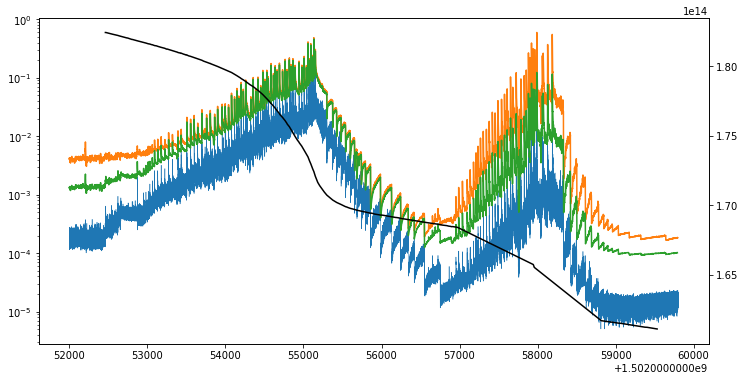

In [8]:
plt.figure(figsize=(12, 6))

d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_FAST"]
d[1][d[1]<=0] = np.nan
plt.plot(d[0], d[1], linewidth=0.5)

d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMEI.06L7.B1E10_TCP.A6L7.B1:LOSS_RS09"]
plt.plot(d[0], d[1])

d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_RS09"]
plt.plot(d[0], d[1])

plt.yscale("log")

plt.twinx()
x = data[6052]["TCP_IR7_B1V"]["lowres"]['timestamps']
plt.plot(x, data[6052]["TCP_IR7_B1V"]["lowres"]['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY'], c="black")


![figure 1](plot1.png "Figure 1")

# Beam 1 - Horizontal

In [9]:
details[6052]["beam1"]

{'vertical': {'startTime': '2017-08-06 22:40:00',
  'endTime': '2017-08-07 00:50:00',
  'stepsRange': [4, 51],
  'measuredEmittance': 4.0,
  'nominalBeamSizeUM': 200,
  'dataFileName': 'local_data/6052_MD_Scraping_BLM_TCP_D6_L7_B1.csv',
  'movingJaw': 'TCP.D6L7.B1:MEAS_LVDT_LU',
  'nonMovingJaw': 'TCP.D6L7.B1:MEAS_LVDT_RU'},
 'horizontal': {'startTime': '2017-08-06 22:40:00',
  'endTime': '2017-08-07 00:50:00',
  'stepsRange': [4, 40],
  'measuredEmittance': 3.5,
  'nominalBeamSizeUM': 280,
  'dataFileName': 'local_data/6052_MD_Scraping_BLM_TCP_C6_L7_B1.csv',
  'movingJaw': 'TCP.C6L7.B1:MEAS_LVDT_LU',
  'nonMovingJaw': 'TCP.C6L7.B1:MEAS_LVDT_RU'}}

In [10]:
data[6052]["TCP_IR7_B1H"]["hires"].keys()

dict_keys(['BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_FAST', 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY', 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY', 'BLMEI.06L7.B1E10_TCP.A6L7.B1:LOSS_RS09', 'BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_RS09'])

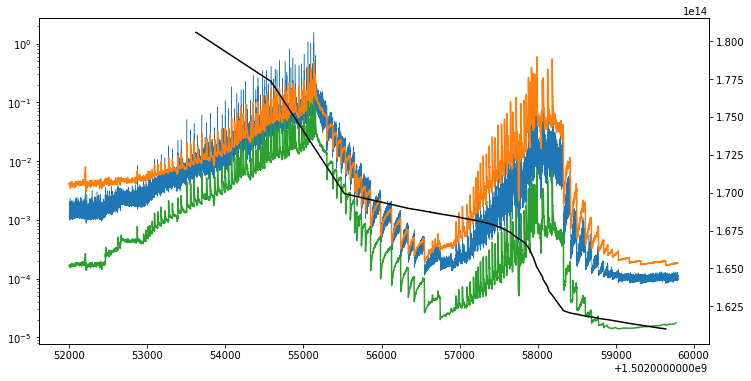

In [11]:
plt.figure(figsize=(12, 6))

d = data[6052]["TCP_IR7_B1H"]["hires"]["BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_FAST"]
d[1][d[1]<=0] = np.nan
plt.plot(d[0], d[1], linewidth=0.5)

d = data[6052]["TCP_IR7_B1H"]["hires"]["BLMEI.06L7.B1E10_TCP.A6L7.B1:LOSS_RS09"]
plt.plot(d[0], d[1])

d = data[6052]["TCP_IR7_B1H"]["hires"]["BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_RS09"]
plt.plot(d[0], d[1])

plt.yscale("log")

plt.twinx()
x = data[6052]["TCP_IR7_B1H"]["lowres"]['timestamps']
plt.plot(x, data[6052]["TCP_IR7_B1H"]["lowres"]['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY'], c="black")


In [12]:
data[6052]["TCP_IR7_B1H"]["lowres"].keys()

dict_keys(['timestamps', 'TCP.C6L7.B1:MEAS_LVDT_LU', 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY', 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY', 'TCP.C6R7.B2:MEAS_LVDT_LU'])

# Both?

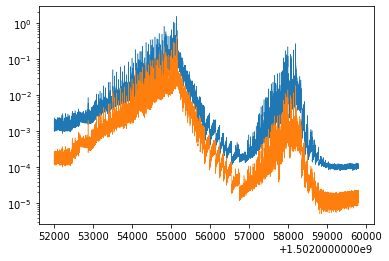

In [13]:
d = data[6052]["TCP_IR7_B1H"]["hires"]["BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_FAST"]
d[1][d[1]<=0] = np.nan
plt.plot(d[0], d[1], linewidth=0.5)

d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_FAST"]
d[1][d[1]<=0] = np.nan
plt.plot(d[0], d[1], linewidth=0.5)

plt.yscale("log")

# Normalized plot

![figure 2](plot2.png "Figure 2")


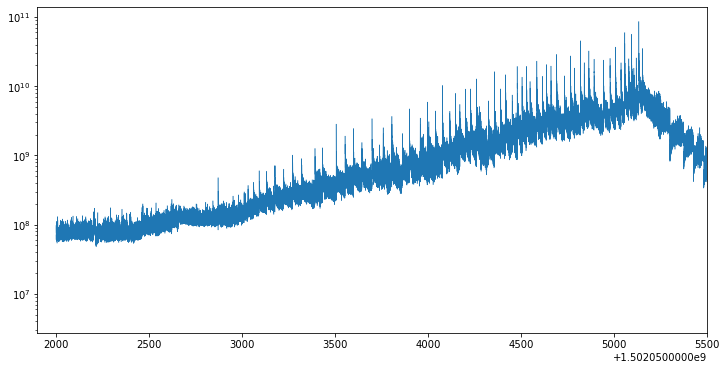

In [14]:
fixed_value = 1.8e-11
plt.figure(figsize=(12, 6))

plt.xlim(51900 +1.5020e9, 55500+1.5020e9)

d = data[6052]["TCP_IR7_B1H"]["hires"]["BLMTI.06L7.B1E10_TCP.C6L7.B1:LOSS_FAST"]
d[1][d[1]<=0] = np.nan
plt.plot(d[0], d[1] / fixed_value, linewidth=0.5)

# d = data[6052]["TCP_IR7_B1H"]["hires"]["BLMEI.06L7.B1E10_TCP.A6L7.B1:LOSS_RS09"]
# plt.plot(d[0], d[1] / fixed_value)

# d = data[6052]["TCP_IR7_B1H"]["hires"]["BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_RS09"]
# plt.plot(d[0], d[1] / fixed_value)

plt.yscale("log")

![figure 2](plot2.png "Figure 2")


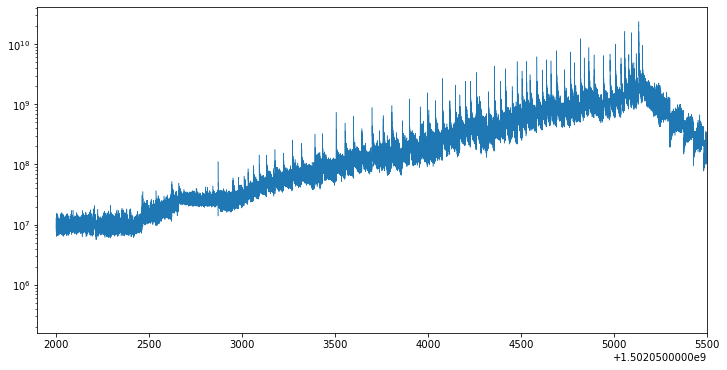

In [15]:
fixed_value = 1.8e-11
plt.figure(figsize=(12, 6))

plt.xlim(51900 +1.5020e9, 55500+1.5020e9)

d = data[6052]["TCP_IR7_B1V"]["hires"]["BLMTI.06L7.B1E10_TCP.D6L7.B1:LOSS_FAST"]
d[1][d[1]<=0] = np.nan
plt.plot(d[0], d[1] / fixed_value, linewidth=0.5)

plt.yscale("log")


![figure 2](plot2.png "Figure 2")

In [16]:
example_value = 4.8
F = m_6052 * example_value + q_6052
print(f"m_6052 = {m_6052}")
print(f"q_6052 = {q_6052}")
print(f"F = {F}")
print(f"Fixed value = {fixed_value}")

m_6052 = -9.7e-14
q_6052 = 6.2e-13
F = 1.5440000000000003e-13
Fixed value = 1.8e-11


In [17]:
F = m_6052 * example_value + q_6052
print(f"F from 6052 = {F}")
F = m_6194 * example_value + q_6194
print(f"F from 6194 = {F}")
F = m_7221 * example_value + q_7221
print(f"F from 7221 = {F}")
F = m_7392 * example_value + q_7392
print(f"F from 7392 = {F}")

print(f"Fixed value used in plot = {fixed_value}")

F from 6052 = 1.5440000000000003e-13
F from 6194 = 1.2680000000000003e-13
F from 7221 = 2.6368000000000004e-13
F from 7392 = 4.82e-13
Fixed value used in plot = 1.8e-11
